In [1]:
fin = open("data/tips.csv")

In [2]:
data = []
labels = fin.readline().strip().split(",")
for line in fin:
    data.append(line.strip().split(","))

In [3]:
labels

['obs', 'totbill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [4]:
data[2]

['3', '21.01', ' 3.50', 'M', 'No', 'Sun', 'Night', '3']

In [5]:
tips = [float(row[2]) for row in data]

In [6]:
tips[:10]

[1.01, 1.66, 3.5, 3.31, 3.61, 4.71, 2.0, 3.12, 1.96, 3.23]

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

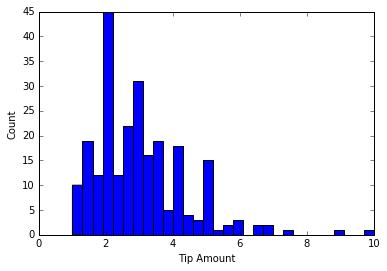

In [12]:
plt.hist(tips, 30)
plt.xlabel("Tip Amount")
plt.ylabel("Count")

In [15]:
days = list(set([row[5] for row in data]))

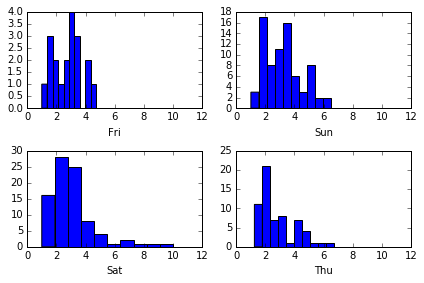

In [19]:
for i in range(len(days)):
    plt.subplot(2, 2, i + 1)
    tipsd = [float(row[2]) for row in data if row[5] == days[i]]
    plt.hist(tipsd)
    plt.xlabel(days[i])
    plt.xlim([0, 12])
plt.tight_layout()

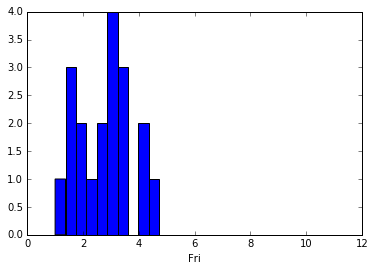

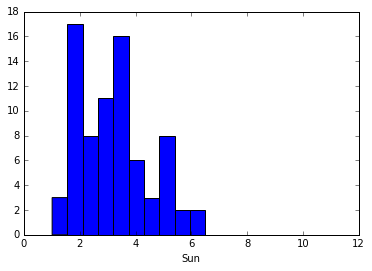

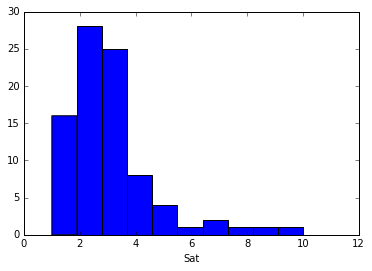

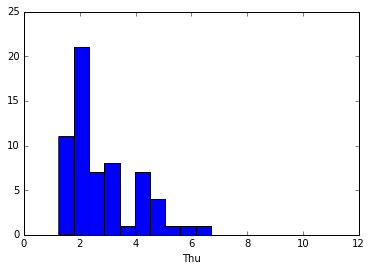

In [55]:
for i in range(len(days)):
    plt.figure(i + 1)
    tipsd = [float(row[2]) for row in data if row[5] == days[i]]
    plt.hist(tipsd)
    plt.xlabel(days[i])
    plt.xlim([0, 12])

In [21]:
amounts = [float(row[1]) for row in data]

In [22]:
tips[:10]

[1.01, 1.66, 3.5, 3.31, 3.61, 4.71, 2.0, 3.12, 1.96, 3.23]

In [23]:
amounts[:10]

[16.99, 10.34, 21.01, 23.68, 24.59, 25.29, 8.77, 26.88, 15.04, 14.78]

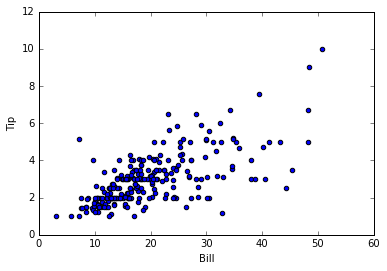

In [26]:
plt.scatter(amounts, tips)
plt.ylabel("Tip")
plt.xlabel("Bill")

In [27]:
tiprate = [t / b for t, b in zip(tips, amounts)]

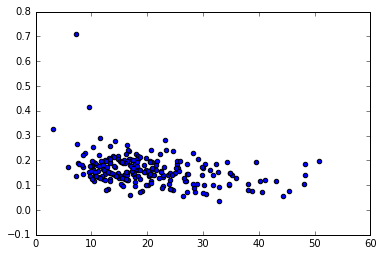

In [33]:
plt.scatter(amounts, tiprate)

In [40]:
import scipy.stats as st
slope, intercept, r_value, p_value, std_error = st.linregress(amounts, tiprate)

In [41]:
slope

-0.0023230242956649386

In [42]:
intercept

0.20676580714825193

In [43]:
r_value

-0.33862408496473467

In [44]:
p_value

5.8480589871585955e-08

In [45]:
std_error

0.00041493658617062503

In [46]:
import numpy as np
interps = np.linspace(0, 60, 200)

In [47]:
len(interps)

200

In [48]:
interps[:10]

array([ 0.        ,  0.30150754,  0.60301508,  0.90452261,  1.20603015,
        1.50753769,  1.80904523,  2.11055276,  2.4120603 ,  2.71356784])

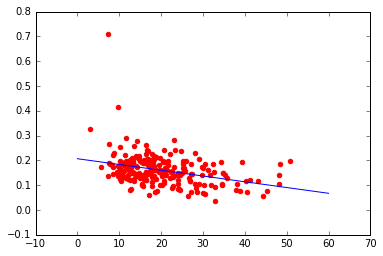

In [53]:
plt.scatter(amounts, tiprate, color="r")
plt.plot(interps, intercept + slope * interps)